In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
longitude_range = (-180, 180)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

614

In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=709eaff6487fadf0c26e0bc441b8c854"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | jumla
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | half moon bay
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | safaga
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | cabra
Processing Record 18 of Set 1 | vestmanna
Processing Record 19 of Set 1 | zapolyarnyy
Processing Record 20 of Set 1 | pedasi
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | gurupi
Processing Record 23 of Set 1 | itarema
Processing Record 24 

Processing Record 10 of Set 4 | bowen
Processing Record 11 of Set 4 | oussouye
Processing Record 12 of Set 4 | torbay
Processing Record 13 of Set 4 | eureka
Processing Record 14 of Set 4 | saint-pierre
Processing Record 15 of Set 4 | puerto carreno
Processing Record 16 of Set 4 | kupang
Processing Record 17 of Set 4 | necochea
Processing Record 18 of Set 4 | tautira
Processing Record 19 of Set 4 | hilo
Processing Record 20 of Set 4 | quatre cocos
Processing Record 21 of Set 4 | upernavik
Processing Record 22 of Set 4 | saint-philippe
Processing Record 23 of Set 4 | karpuninskiy
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 24 of Set 4 | sao filipe
Processing Record 25 of Set 4 | sorong
Processing Record 26 of Set 4 | mena
Processing Record 27 of Set 4 | marcona
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 28 of Set 4 | kaeo
Processing Record

Processing Record 19 of Set 7 | broken hill
Processing Record 20 of Set 7 | ossora
Processing Record 21 of Set 7 | tumut
Processing Record 22 of Set 7 | boueni
Processing Record 23 of Set 7 | businga
Processing Record 24 of Set 7 | katsuura
Processing Record 25 of Set 7 | buraydah
Processing Record 26 of Set 7 | sarkand
Processing Record 27 of Set 7 | mahebourg
Processing Record 28 of Set 7 | paragominas
Processing Record 29 of Set 7 | bara
Processing Record 30 of Set 7 | alice springs
Processing Record 31 of Set 7 | capitao poco
Processing Record 32 of Set 7 | tucson
Processing Record 33 of Set 7 | waipawa
Processing Record 34 of Set 7 | luba
Processing Record 35 of Set 7 | paso de los toros
Processing Record 36 of Set 7 | korla
Processing Record 37 of Set 7 | nouakchott
Processing Record 38 of Set 7 | kopervik
Processing Record 39 of Set 7 | ukiah
Processing Record 40 of Set 7 | kruisfontein
Processing Record 41 of Set 7 | willowmore
Processing Record 42 of Set 7 | vaitupu
City not f

Processing Record 46 of Set 10 | karaul
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 47 of Set 10 | magan
Processing Record 48 of Set 10 | maniitsoq
Processing Record 49 of Set 10 | sao felix do xingu
Processing Record 0 of Set 11 | isiro
Processing Record 1 of Set 11 | ardabil
Processing Record 2 of Set 11 | caramay
Processing Record 3 of Set 11 | manggar
Processing Record 4 of Set 11 | hit
Processing Record 5 of Set 11 | meshcherino
Processing Record 6 of Set 11 | solnechnyy
Processing Record 7 of Set 11 | huandacareo
Processing Record 8 of Set 11 | dongsheng
Processing Record 9 of Set 11 | barrancas
Processing Record 10 of Set 11 | cervo
Processing Record 11 of Set 11 | laguna
Processing Record 12 of Set 11 | lavrentiya
Processing Record 13 of Set 11 | tuim
Processing Record 14 of Set 11 | tumannyy
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing R

In [5]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Windspeed     561
dtype: int64

In [6]:
# Display the city Data Frame
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,jamestown,0,US,1651344188,22,42.0970,-79.2353,65.52,3.44
1,jumla,71,NP,1651344271,75,29.2747,82.1838,51.24,3.76
2,arraial do cabo,75,BR,1651344271,78,-22.9661,-42.0278,76.86,9.22
3,port alfred,2,ZA,1651344272,79,-33.5906,26.8910,59.18,4.00
4,busselton,0,AU,1651344272,86,-33.6500,115.3333,55.24,5.44


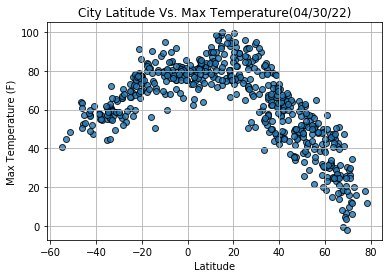

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

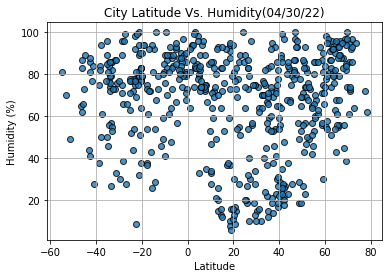

In [8]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

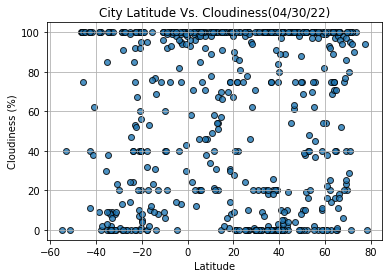

In [9]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

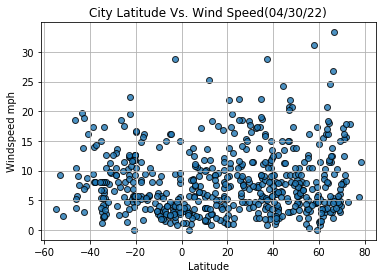

In [10]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

The r-squared is: -0.8570644689449544


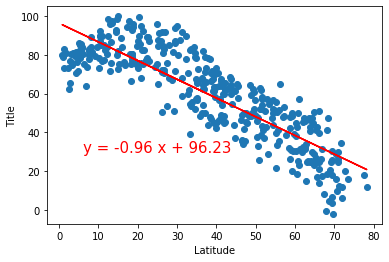

In [13]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7831776945276032


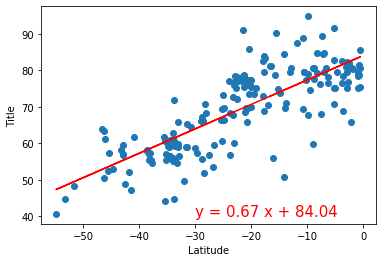

In [14]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))


The r-squared is: 0.14294437526341106


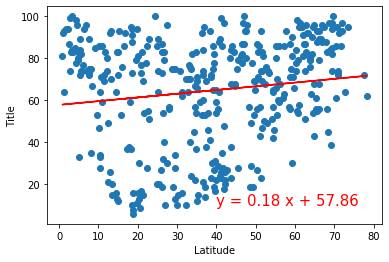

In [15]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.1681301140285075


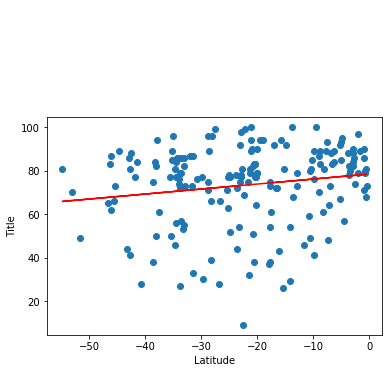

In [16]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

The r-squared is: -0.06283003210334946


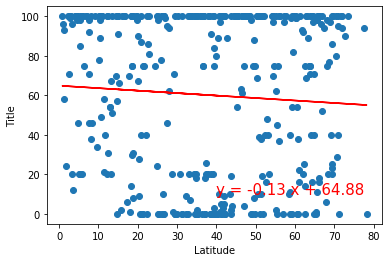

In [17]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.2473336367577339


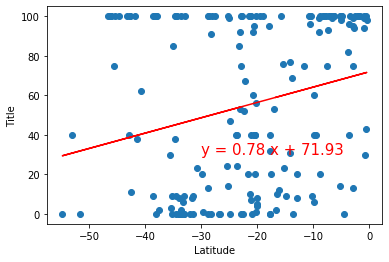

In [18]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

The r-squared is: 0.11531078104343705


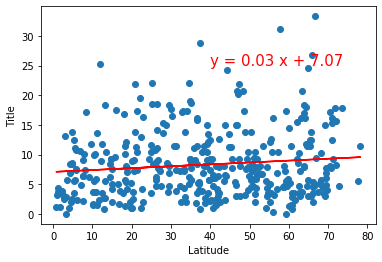

In [19]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.1982429903985545


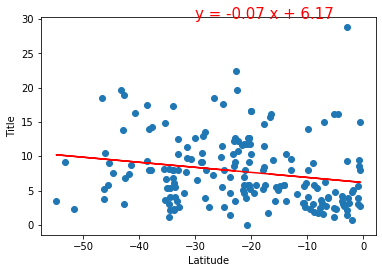

In [20]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))